<a href="https://colab.research.google.com/github/prithvimathavan/CODSOFT/blob/main/IRIS_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

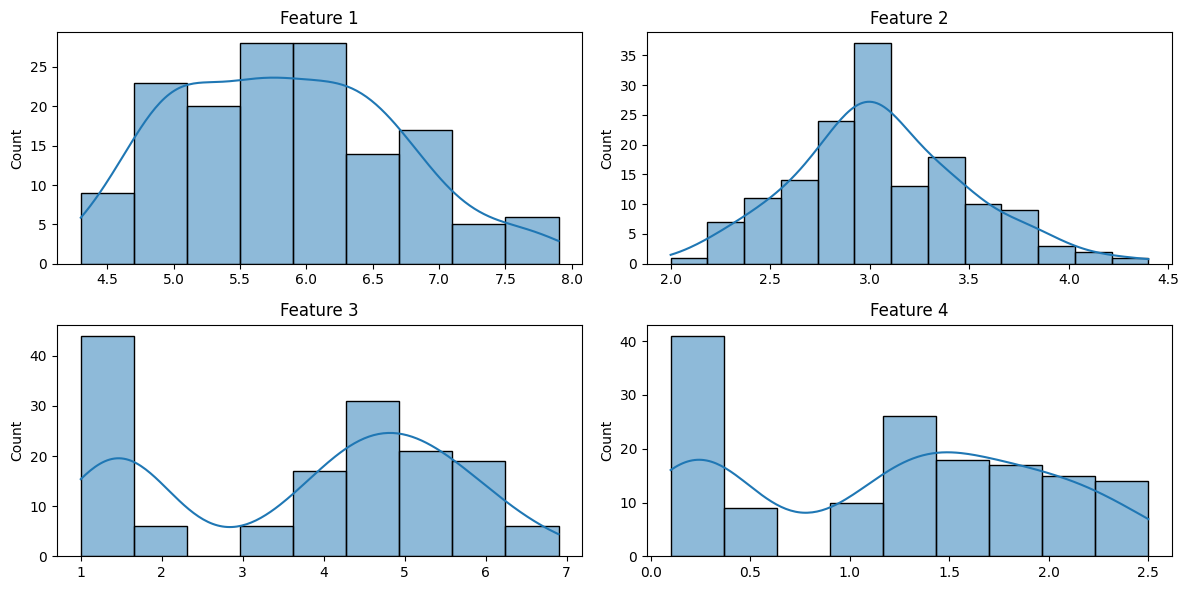


Model: KNN
Best Hyperparameters: {'n_neighbors': 3}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Model: Random Forest
Best Hyperparameters: {'n_estimators': 100}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



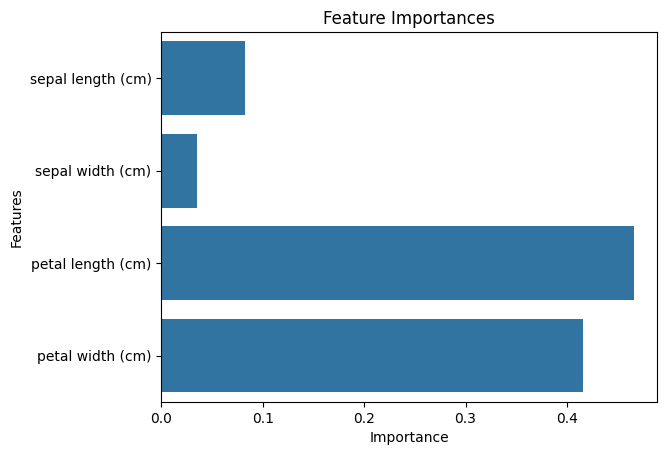


Prediction on New Flower:
Predicted species: versicolor


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Visualize the distribution of each feature
plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(X[:, i], kde=True)
    plt.title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

# Split data into training and testing sets (80/20 split with random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for hyperparameter tuning (examples for KNN and Random Forest are given)
knn = {'n_neighbors': [3, 5, 7]}
rf = {'n_estimators': [100, 200, 300]}

models = [
    ('KNN', GridSearchCV(KNeighborsClassifier(), knn, cv=5)),
    ('Random Forest', GridSearchCV(RandomForestClassifier(), rf, cv=5))
]

for name, model in models:
    # Train the model with hyperparameter tuning
    model.fit(X_train, y_train)

    best_model = model.best_estimator_ if hasattr(model, 'best_estimator_') else model
    best_params = model.best_params_ if hasattr(model, 'best_params_') else None

    # Make predictions on the testing set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    if best_params:
        print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize feature importances (for Random Forest only)
    if name == 'Random Forest':
        importances = best_model.feature_importances_
        plt.figure()
        sns.barplot(x=importances, y=iris.feature_names)
        plt.title('Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.show()

# Prediction on a new flower (we can relpace the input values based on the measurement as well)
new_flower = np.array([[7, 9, 3.6, 1]])
predicted_species = best_model.predict(new_flower)
species_names = iris.target_names[predicted_species]
print("\nPrediction on New Flower:")
print(f"Predicted species: {species_names[0]}")
